In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
np.loadtxt('characters_moby.txt', dtype=str)

array(['c', 'a', 'l', ..., 'n', 'i', 's'], dtype='<U1')

In [68]:
Data = np.loadtxt('characters_moby.txt', dtype=str)

In [69]:
C_list, Freq = np.unique(Data,return_counts=True)

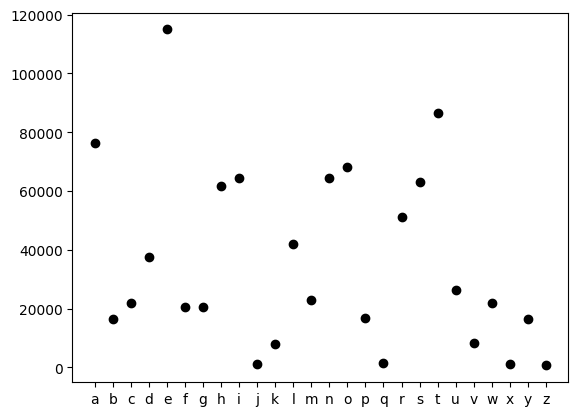

In [70]:
plt.plot(C_list,Freq,'ko')

In [71]:
V = ['a','e','i','o','u']

States = []

for x in Data:
    if x in V:
        s = 0
    else:
        s = 1
    States.append(s)

In [72]:
Transition = np.zeros((2,2))

In [73]:
for i in range(len(States)-1):
    current_state = States[i]
    next_state = States[i+1]
    Transition[current_state][next_state] += 1
    

In [74]:
matW = np.zeros((2,2))

for i in range(2):
    matW[i] = Transition[i]/np.sum(Transition[i])

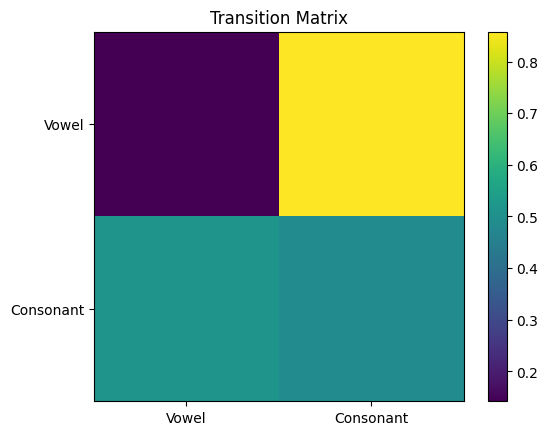

In [75]:
plt.imshow(matW)
plt.colorbar()
plt.xticks([0,1],['Vowel','Consonant'])
plt.yticks([0,1],['Vowel','Consonant'])
plt.title('Transition Matrix')
plt.show()

In [76]:
V

['a', 'e', 'i', 'o', 'u']

In [77]:
V.index('e')

1

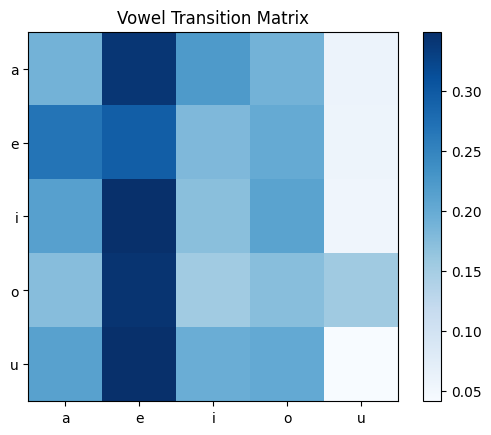

In [78]:
# Crear una matriz de transición para las vocales
vowel_transition_matrix = np.zeros((len(V), len(V)))

# Filtrar las vocales en los datos y calcular las transiciones
vowel_indices = [i for i, char in enumerate(Data) if char in V]
for i in range(len(vowel_indices) - 1):
    current_vowel = Data[vowel_indices[i]]
    next_vowel = Data[vowel_indices[i + 1]]
    current_index = V.index(current_vowel)
    next_index = V.index(next_vowel)
    vowel_transition_matrix[current_index][next_index] += 1

# Normalizar la matriz para obtener probabilidades
for i in range(len(V)):
    vowel_transition_matrix[i] = vowel_transition_matrix[i] / np.sum(vowel_transition_matrix[i])

# Mostrar la matriz de transición
plt.imshow(vowel_transition_matrix, cmap='Blues')
plt.colorbar()
plt.xticks(range(len(V)), V)
plt.yticks(range(len(V)), V)
plt.title('Vowel Transition Matrix')
plt.show()

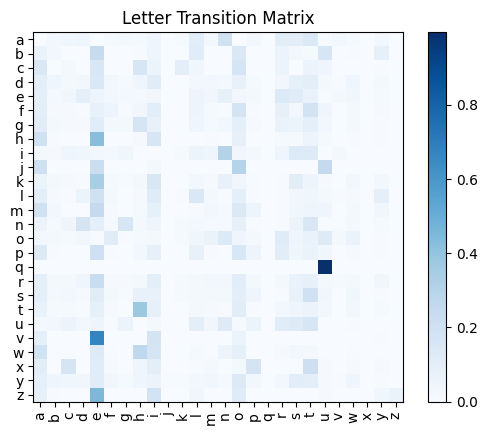

In [79]:
# Crear una matriz de transición para todas las letras
letter_transition_matrix = np.zeros((len(C_list), len(C_list)))

# Calcular las transiciones
for i in range(len(Data) - 1):
    current_letter = Data[i]
    next_letter = Data[i + 1]
    current_index = np.where(C_list == current_letter)[0][0]
    next_index = np.where(C_list == next_letter)[0][0]
    letter_transition_matrix[current_index][next_index] += 1

# Normalizar la matriz para obtener probabilidades
for i in range(len(C_list)):
    letter_transition_matrix[i] = letter_transition_matrix[i] / np.sum(letter_transition_matrix[i])

# Mostrar la matriz de transición
plt.imshow(letter_transition_matrix, cmap='Blues')
plt.colorbar()
plt.xticks(range(len(C_list)), C_list, rotation=90)
plt.yticks(range(len(C_list)), C_list)
plt.title('Letter Transition Matrix')
plt.show()

In [85]:
np.linalg.matrix_power(vowel_transition_matrix, 1000)

array([[0.21820204, 0.32833977, 0.18397031, 0.19466983, 0.07481805],
       [0.21820204, 0.32833977, 0.18397031, 0.19466983, 0.07481805],
       [0.21820204, 0.32833977, 0.18397031, 0.19466983, 0.07481805],
       [0.21820204, 0.32833977, 0.18397031, 0.19466983, 0.07481805],
       [0.21820204, 0.32833977, 0.18397031, 0.19466983, 0.07481805]])

In [ ]:
#Stochastic Numerical Methods - Recomended Reading